# Orders - Multivariate Regression of  the `review_score`

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [45]:
orders = pd.read_csv("data/tablon_primario.csv")


In [46]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'es_cinco_estrellas',
       'es_una_estrella', 'count_order_items', 'seller_id', 'price',
       'freight_value', 'distancia_a_la_orden'],
      dtype='object')

In [47]:
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,...,review_comment_message,review_creation_date,review_answer_timestamp,es_cinco_estrellas,es_una_estrella,count_order_items,seller_id,price,freight_value,distancia_a_la_orden
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0,0,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,...,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0,0,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,...,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,0,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,...,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1,0,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,...,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,1,0,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,...,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08,1,0,1,1,72.00,13.08,69.481037
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,...,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,0,0,1,1,174.90,20.10,474.098245
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,...,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,0,1,1,205.99,65.02,968.051192
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,...,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,0,0,2,1,359.98,81.18,370.146853


In [48]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95880 entries, 0 to 95879
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     95880 non-null  int64  
 1   order_id                       95880 non-null  object 
 2   customer_id                    95880 non-null  object 
 3   order_status                   95880 non-null  object 
 4   order_purchase_timestamp       95880 non-null  object 
 5   order_approved_at              95866 non-null  object 
 6   order_delivered_carrier_date   95878 non-null  object 
 7   order_delivered_customer_date  95872 non-null  object 
 8   order_estimated_delivery_date  95880 non-null  object 
 9   tiempo_de_espera               95872 non-null  float64
 10  tiempo_de_espera_previsto      95866 non-null  float64
 11  real_vs_esperado               95858 non-null  float64
 12  review_id                      95880 non-null 

Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

<Axes: >

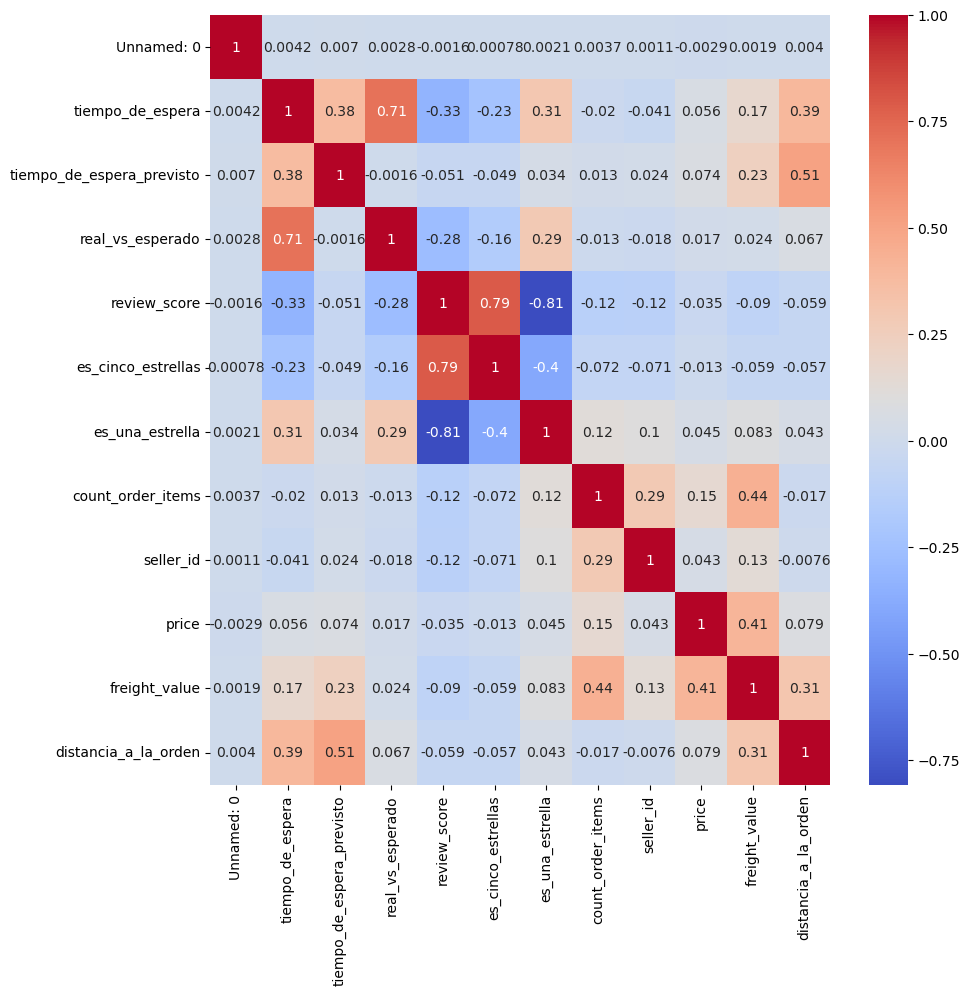

In [49]:
numeric_columns = orders.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(
    numeric_columns.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10})

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [50]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [51]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula = "review_score ~ tiempo_de_espera", data = orders)
model2 = smf.ols(formula = "review_score ~ real_vs_esperado", data = orders)

In [52]:
model1 = model1.fit()


In [53]:
model2 = model2.fit()


In [54]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:01:10   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006    727.904      0.000       4.711       4.736
tiempo_de_espera    -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


El R-cuadrado es 0.112, sugiere que el 11.2% de la variabilidad en "review_score" se explica por "tiempo_de_espera". 

El coeficiente de "tiempo_de_espera" es -0.0454, lo que significa que, en promedio, por cada unidad de aumento en "tiempo_de_espera", la puntuación de revisión ("review_score") disminuye en 0.0454 unidades. 

El valor p asociado con el coeficiente de "tiempo_de_espera" es 0.000, significa que es estadísticamente significativo.

Los intervalos de confianza para el coeficiente de "tiempo_de_espera" son (-0.046, -0.045). significa que con un 95% de confianza, esperaríamos que el verdadero valor del coeficiente caiga dentro de este rango. 

Con estas estadisticas podemos evaluar la normalidad de los residuos del modelo. En un gráfico de Seaborn, podrías notar la forma y la cola de la distribución de los residuos. 

Podemos interpretar con este modelo de regresión una relación entre "tiempo_de_espera" y las puntuaciones de revisión. Sin embargo, el R-squared relativamente bajo muestra que la variabilidad en las puntuaciones de revisión no se explica  por esta variable independiente.

***Modelo 2***:

In [55]:
model2.summary()

# Programar acá

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7982.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:01:10   Log-Likelihood:            -1.5623e+05
No. Observations:               95858   AIC:                         3.125e+05
Df Residuals:                   95856   BIC:                         3.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2160      0.004   1042.188      0.000       4.208       4.224
real_vs_esperado    -0.0752      0.001    -89.341      0.000      -0.077      -0.074
==============================================================================
Omnibus:                    20681.655   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50302.380
Skew:                          -1.201   Prob(JB):                         0.00
Kurtosis:                       5.613   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Los resultados de la regresión muestran que hay una relación entre la variable independiente "real_vs_esperado" y las puntuaciones de revisión ("review_score"). 
El R-squared es bajo (7.7%), indica que solo una pequeña parte de la variabilidad en las puntuaciones de revisión se explica por esta variable. El coeficiente para "real_vs_esperado" es -0.0752, podemos interprestar que en promedio, por cada unidad de cambio en "real_vs_esperado", la puntuación de revisión disminuye en 0.0752 unidades. Ambos coeficientes son significativos con valores p creca a cero. 

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



***Modelo 3***:

In [56]:
model3 = smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado ',data=orders)


In [57]:
model3=model3.fit()


In [58]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6222.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:01:10   Log-Likelihood:            -1.5422e+05
No. Observations:               95858   AIC:                         3.084e+05
Df Residuals:                   95855   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6432      0.008    599.481      0.000       4.628       4.658
tiempo_de_espera    -0.0376      0.001    -64.179      0.000      -0.039      -0.036
real_vs_esperado    -0.0221      0.001    -18.944      0.000      -0.024      -0.020
==============================================================================
Omnibus:                    20038.300   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41107.951
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       5.024   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

Para evaluar el impacto en `review_score` al agregar un día más a la variable `real_vs_esperado` manteniendo todas las demás variables constantes en este nuevo modelo, se puede utilizar el coeficiente de regresión de `real_vs_esperado`. El coeficiente de `real_vs_esperado` es -0.0221. En promedio, por cada día adicional de `real_vs_esperado`, la puntuación de revisión disminuye en 0.0221 unidades en este modelo.

Agregar un día más a la variable `real_vs_esperado` tiene un impacto negativo de aproximadamente -0.0221 unidades en `review_score` en este nuevo modelo. Además, el modelo que incluye tanto `tiempo_de_espera` como `real_vs_esperado` es  más explicativo de `review_score` en comparación con los modelos que consideraban solo una de las dos variables. Sin embargo, el R-squared sigue siendo bajo, esto propone que otros factores también influyan en las puntuaciones de revisión.

***Modelo 4***:

¿Que variables considerar?

In [59]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'es_cinco_estrellas',
       'es_una_estrella', 'count_order_items', 'seller_id', 'price',
       'freight_value', 'distancia_a_la_orden'],
      dtype='object')

Crear el `modelo4`

In [60]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + seller_id + price + freight_value + distancia_a_la_orden'

In [61]:
#

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

In [62]:
#


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

Computar rmse

In [63]:
##codear RMS (Buscar en wikipedia)

Plotear los resultados

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.